####   Import libraries

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Data Extraction & Cleaning

In [170]:
path = r"C:\Users\hosam\Desktop\Desktop_folders\data_analysis_problems_python\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data"

#Create a list of all files inside the folder directory

files = [file for file in os.listdir(path)]

#### Combine csv files into a single DataFrame

In [173]:
# Initialize an empty list to store DataFrames
dfs = []

# Loop through each file in the folder and read it into a DataFrame
for file in files:
    df = pd.read_csv(os.path.join(path,file))
    dfs.append(df)

# Concatenate all DataFrames into one
dfs = pd.concat(dfs, ignore_index = False)

# Save the combined DataFrame as a new CSV file
dfs.to_csv('dfs.csv')

#### Data cleaning

In [176]:
# Drop rows with missing values
dfs = dfs.dropna()

# Remove rows where 'Order Date' contains the header text
dfs = dfs[~dfs['Order Date'].str.contains('Order Date')]


In [178]:
# Convert columns to the correct data types
dfs['Quantity Ordered'] =  dfs['Quantity Ordered'].astype(int)
dfs['Price Each'] =  dfs['Price Each'].astype(float)

In [180]:
# Create a new column for total sales
dfs['Sales'] = dfs['Quantity Ordered'] * dfs['Price Each']

In [182]:
# Extract the month from the 'Order Date' column
dfs['Months'] = dfs['Order Date'].str[0:2].astype(int)

In [184]:
# Helper functions to extract City and State from the Purchase Address

def get_city(address):
    return address.split(',')[1]

def get_State(address):
    return address.split(',')[2].split(' ')[1]

dfs['City'] = dfs['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_State(x))

### Data Exploration

#### Q1: What was the best month for sales? How much was earned that month?

In [187]:
# Group sales by month
Months_Sales = dfs.groupby('Months')['Sales'].sum().reset_index()

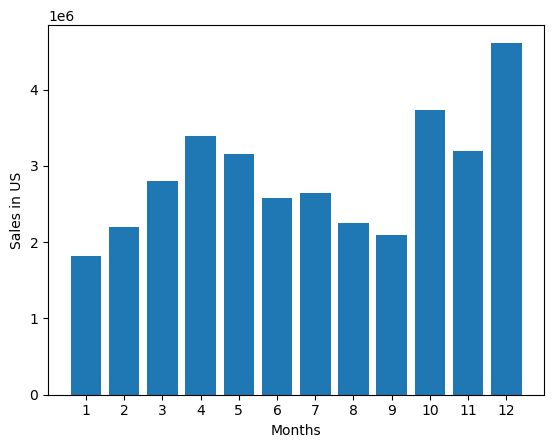

In [189]:
# Define months from 1 to 12 for x-axis
months = range(1,13)

# Plot sales by month
plt.bar(months,Months_Sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in US')
plt.xlabel('Months')
plt.show()


#### Q2: What city sold the most product

In [192]:
# Group sales by city
City_Sales = dfs.groupby('City')['Sales'].sum().reset_index()

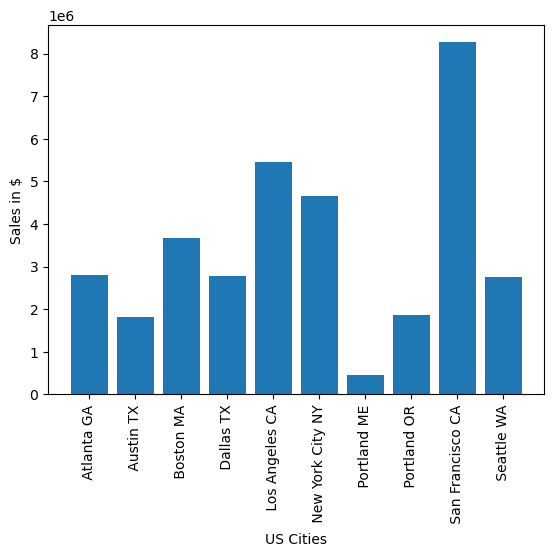

In [194]:
# Plot sales by city

plt.bar(City_Sales['City'],City_Sales['Sales'])
plt.xticks(City_Sales['City'], rotation = 90)
plt.ylabel('Sales in $')
plt.xlabel('US Cities')
plt.show()

#### Q3: what is the best time to advertising? to maximize the liklihood of customer's buying products

In [197]:
# Make a copy of the DataFrame
xx = dfs

# Extract the hour from 'Order Date' and create a new 'Hour' column
xx['Hour'] = dfs['Order Date'].str[9:11].astype(int)

# Group by hour and sum the quantity ordered
xx = dfs.groupby('Hour')['Quantity Ordered'].sum().reset_index()

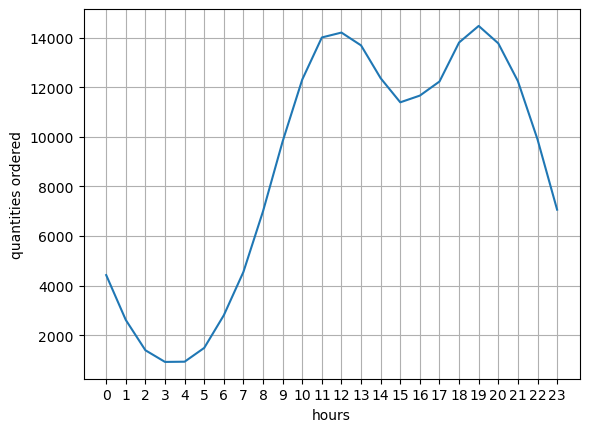

In [199]:
# Plot quantity ordered by hour

plt.plot(xx['Hour'],xx['Quantity Ordered'])
plt.xticks(dfs['Hour'].sort_values().unique())
plt.ylabel('quantities ordered')
plt.xlabel('hours')
plt.grid()
plt.show()

#### Q4: What products are most often sold together?

In [202]:
# Select orders with more than one product
duplicates = dfs[dfs['Order ID'].duplicated(keep=False)]

# Combine product names in each order into a single string
duplicates = duplicates.groupby('Order ID', as_index=False).agg({
    'Product': lambda x: ','.join(x)
})

In [204]:
# Importing required libraries
from itertools import combinations
from collections import Counter

# Count product combinations
count = Counter()

for row in duplicates['Product']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
# Print the 5 most common product pairs
for key,value in count.most_common(5):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361


#### Q5: what product sold most

In [207]:
# Group by product and sum the quantity ordered
most_sold = dfs.groupby('Product')['Quantity Ordered'].sum().reset_index()

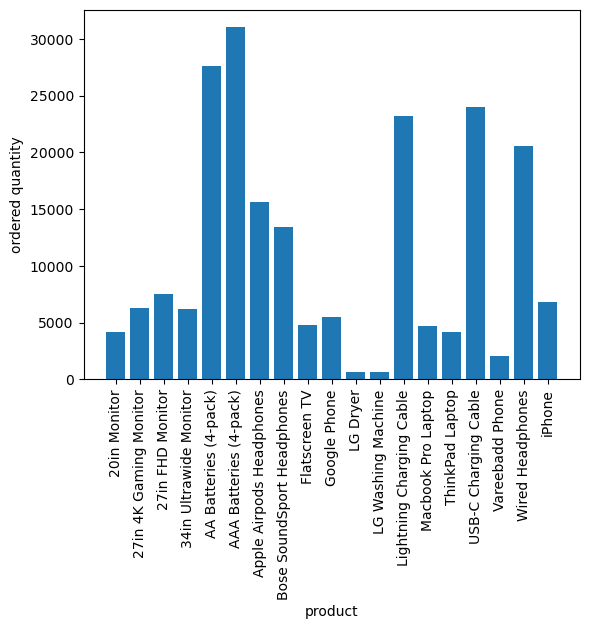

In [209]:
# Plot the quantity ordered for each product

plt.bar(most_sold['Product'],most_sold['Quantity Ordered'])
plt.xticks(most_sold['Product'], rotation = 90)
plt.ylabel('ordered quantity')
plt.xlabel('product')
plt.show()